1: Оценить En(ξ) с помощью МСМС для графа 8х8

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels.tsa import stattools

A = np.zeros((8, 8), dtype = bool)

def func(x):
    y = x.copy()
    b = []
    A1 = np.random.randint(8)
    A2 = np.random.randint(8)
    
    if (A1 == 0  and A2 == 0):
        b += (x[A1, A2+1], x[A1+1, A2])
    elif (A1 == 7  and A2 == 0):
        b += (x[A1-1, A2], x[A1, A2+1])
    elif (A1 == 0  and A2 == 7):
        b += (x[A1, A2-1], x[A1+1, A2])
    elif (A1 == 7  and A2 == 7):
        b += (x[A1, A2-1], x[A1-1, A2])
    elif (A1 == 0 and 0 < A2 < 7):
        b += (x[A1+1, A2], x[A1, A2-1], x[A1, A2+1])
    elif (A1 == 7 and 0 < A2 < 7):
        b += (x[A1-1, A2], x[A1, A2-1], x[A1, A2+1])
    elif (A2 == 0 and 0 < A1 < 7):
        b += (x[A2+1, A1], x[A2, A1-1], x[A2, A1+1])
    elif (A2 == 7 and 0 < A1 < 7):
        b += (x[A2-1, A1], x[A2, A1-1], x[A2, A1+1])
    else:
        b += (x[A1-1, A2], x[A1, A2-1], x[A1, A2+1], x[A1+1, A2])
    step = 0
    for j in b:
        step += j
    if (step > 0):
        y[A1, A2] = False
    else:
        y[A1, A2] = bool(np.random.randint(2))
    return y

In [68]:
def Mc(x, niter = 100000, nburn = 100):
    s = []
    c = x
    res = []
    for i in range(niter):
        res.append(c)
        s.append(np.sum(np.array(c)))
        c = func(c)
    return res[nburn:], np.array(s[nburn:]), s
result, S, s = Mc(A)
print("En(ξ) = ", S.mean())

En(ξ) =  15.158868868868868


2: Обосновать численно и графически стационарность

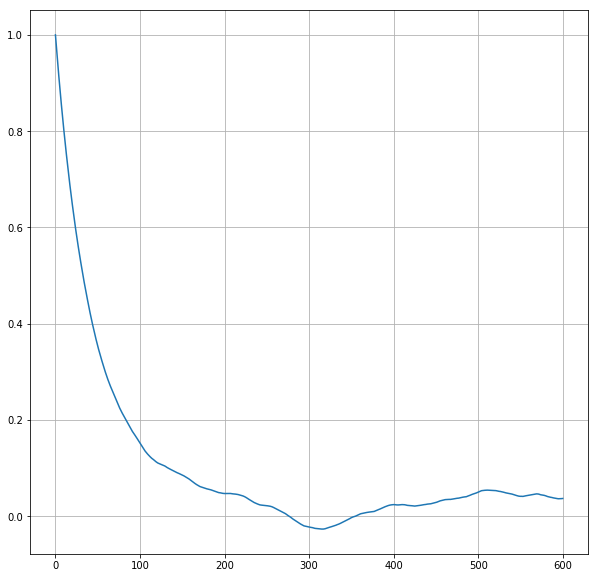

In [69]:
autocorr = stattools.acf(s, fft = False, nlags = 600)
plt.figure(figsize = (10, 10))
plt.plot(autocorr)
plt.grid(True)
plt.show()

Из графика видно, что мы можем прореживать выборку с шагом примерно 300

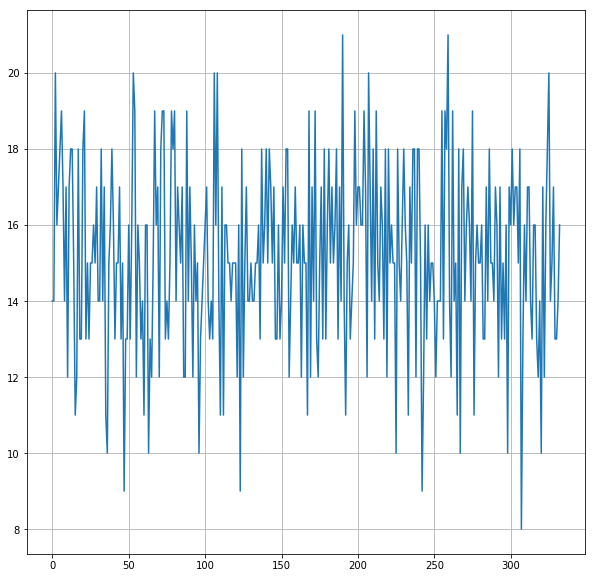

In [70]:
plt.figure(figsize = (10, 10))
S1 = S[::300]
plt.plot(S1)
grid1 = plt.grid(True)
plt.show()

In [71]:
def g_test(x, start=0.1, end=0.5):
    return stats.ttest_ind(x[:int(len(x) * start)], x[-int(len(x) * end):], equal_var=False)

g_test(S1)

Ttest_indResult(statistic=0.8235838932213583, pvalue=0.41432469547514283)

Тест Стьюдента подтвердил гипотезу стационарности

3: Построить график распределеиня $n(\xi)$

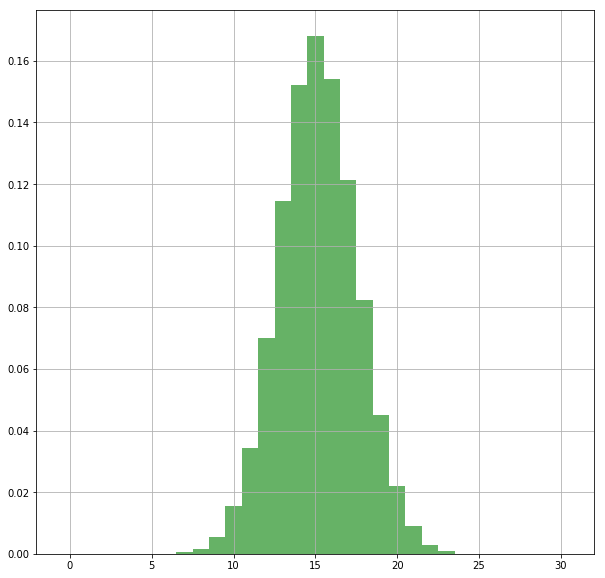

In [72]:
plt.figure(figsize = (10, 10))
plt.hist(S, bins = np.arange(32) - 0.5, density=True, color = 'g', alpha = 0.6)
plt.grid(True)
plt.show()

4: Изобразить раскраску для одного из случайных графов, взятых из стационарного распределения.

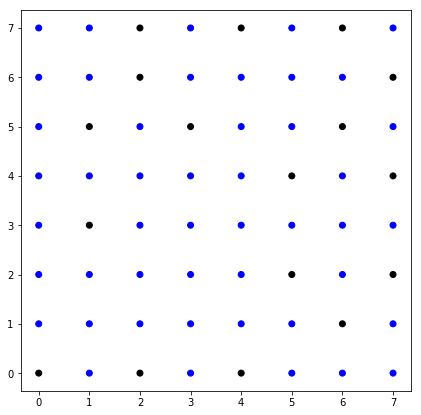

In [73]:
def coloring(Array):
    colors = np.empty(Array.shape, dtype='U5')
    colors[:] = 'b'
    colors[Array] = 'black'
    x, y = np.indices((Array.shape))
    plt.figure(figsize = (7, 7))
    plt.scatter(x, y, c=colors.ravel())
    plt.show()

coloring(result[-1])